In [297]:
f = open("krots.txt","r")
lines = f.read().splitlines()
moves = {}
for line in lines:
    moves[line[0]] = [i for i in line[3:-1].split(",")]
f.close()
moves["l"] = combine(moves["L"],moves["M"])
moves["r"] = combine(moves["R"],invertraw("M"))
moves["d"] = combine(moves["D"],moves["E"])
moves["u"] = combine(moves["U"],invertraw("E"))
moves["f"] = combine(moves["F"],moves["S"])
moves["b"] = combine(moves["B"],invertraw("S"))
moves["X"] = combine(moves["r"],invertraw("L"))
moves["Y"] = combine(moves["u"],invertraw("D"))
moves["Z"] = combine(moves["f"],invertraw("B"))

In [12]:
orientation = {"U":2,"R":6,"F":1,"D":5,"L":3,"B":4}
identity = []
for key in orientation.keys():
    for i in range(9):
        identity.append(f"{key}{i+1}")
facelets = {}
for i in identity:
    facelets[i] = orientation[i[0]]

In [261]:
def invertraw(movei):
    move = moves[movei]
    newmove = []
    for i1 in identity:
        newmove.append(identity[move.index(i1)])
    return newmove
    

In [128]:
def turn(move,inv):
    newfacelets = {}
    perm = moves[move]
    for i in zip(identity,perm):
        global facelets
        newfacelets[i[1-inv]] = facelets[i[0-inv]]
    facelets = newfacelets

In [259]:
def combine(m1,m2):
    newmove = []
    for i1 in m1:
        newmove.append(m2[identity.index(i1)])
    return newmove

In [187]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
orientation = {"U":2,"R":6,"F":1,"D":5,"L":3,"B":4}
def plot_matrix(rm, title='', cmap=plt.cm.Blues):
    plt.figure(figsize=[10,5])
    plt.imshow(rm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.tight_layout()
    for i in range(6):
        for j in range(3):
            for k in range(3):
                if i == 0:
                    ax = plt.gca()
                    ax.add_patch(plt.Rectangle((j+3-.5, k-.5), 1,1, fill=False,linewidth=3))
                elif i in [1,2,3,4]:
                    ax = plt.gca()
                    ax.add_patch(plt.Rectangle((j+(i-1)*3-.5, k+3-.5), 1,1, fill=False,linewidth=3))
                else:
                    ax = plt.gca()
                    ax.add_patch(plt.Rectangle((j+3-.5, k+6-.5), 1,1, fill=False,linewidth=3))
    plt.show()               

yellow = [i/255 for i in [249,214,72,255]]
green = [i/255 for i in [67,149,80,255]]
orange = [i/255 for i in [237,99,43,255]]
red = [i/255 for i in [168,40,56,255]]
blue = [i/255 for i in [24,71,167,255]]
    
cmap = colors.ListedColormap([blue,'white',red,green,yellow,orange])
def plot_cube():
    b = np.ones((3,3))*2
    arrays = {}
    for key in orientation.keys():
        a = np.zeros((3,3))
        for i in range(3):
            for j in range(3):
                a[i,j] = facelets[f"{key}{3*i+j+1}"]
        arrays[key] = a
    cubearray = np.concatenate([np.concatenate([b,arrays["U"],b,b],1),np.concatenate([arrays["L"],arrays["F"],arrays["R"],arrays["B"]],1),np.concatenate([b,arrays["D"],b,b],1)])
    plot_matrix(cubearray,cmap=cmap)
def color_cube():
    f = open("coloring.txt","r")
    lines = f.read().splitlines()
    f.close()
    for iden,facelet in zip(identityc,lines[2][1:-1].split(",")):
        fl = facelet[1:-1].split(",")
        for j in range(len(fl)):
            facelets[fl[j]] = orientation[{i:x for i,x in zip(identityc,lines[0][1:-1].split(","))}[cubies[iden].c][j][0]]
        
        

In [336]:
def move(alg,invert=0):
    if invert==1:
        alg = invert_sequence(alg)
    algmoves = []
    alg = alg.replace(" ","")
    alg = alg.replace("*","")
    for move in alg:
        if move == "'" or move == "2":
            algmoves[-1] += move
        else:
            algmoves.append(move)
    for move in algmoves:
        reps = 1
        inv = 0
        if len(move) == 2:
            if move[1] == "2":
                reps = 2
            else:
                inv = 1
        for _ in range(reps):
            turn(move[0],inv)

In [335]:
def invert_sequence(sequence):
    moves = []
    alg = sequence
    alg = alg.replace(" ","")
    alg = alg.replace("*","")
    for move in alg:
        if move == "'" or move == "2":
            moves[-1] += move
        else:
            moves.append(move)
    moves.reverse()
    out = []
    for move in moves:
        if len(move) == 1:
            out.append(f"{move}'")
        else:
            if move[1] == "2":
                out.append(move)
            else:
                out.append(move[0])
    return "".join(out)

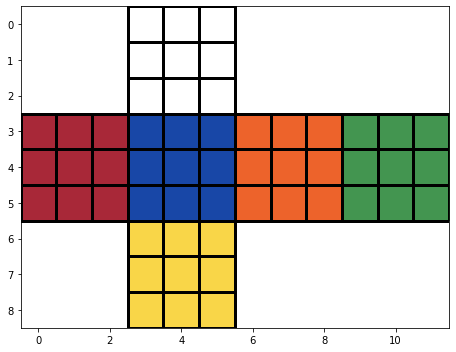

In [296]:
move("DBFUR'L'DL2F2D2FL2R2F'R'BR2B'R'B'L2B2U2LU2F2L2F2L'B2LB2L'R2U2R2D2F2U2B2D2F2B2L2B2L2B2")
plot_cube()

In [374]:
move("R2*L*U2*L2*D*R2*U2*L'*D2*R'*U*B*R'*F2*L2*B2*L2*B2")
plot_cube()

KeyError: 'U1'

In [372]:
f = open("perm.txt","r")
lines = f.read().splitlines()
for i in range(6*9):
    if i<9:
        facelets[f"U{i+1}"] = lines[i//3][i%3+3]
    elif i>=9 and i<45:
        if i<18:
            facelets[f"L{i-8}"] = lines[i//3][i%3]
        elif i>=18 and i<27:
            facelets[f"F{i-17}"] = lines[i//3-3][i%3+3]
        elif i>=27 and i<36:
            facelets[f"R{i-26}"] = lines[i//3-6][i%3+6]
        elif i>=36:
            facelets[f"B{i-35}"] = lines[i//3-9][i%3+9]
    else:
        facelets[f"D{i-44}"] = lines[i//3-9][i%3+3]

In [522]:
##CUBIE LEVEL
f = open("krotscorner.txt","r")
linesc = f.read().splitlines()
f.close()
f = open("krotsedge.txt","r")
linese = f.read().splitlines()
f.close()
f = open("krotscsym.txt","r")
linescs = f.read().splitlines()
f.close()
f = open("krotsesym.txt","r")
lineses = f.read().splitlines()
f.close()

moves = {}
syms = {}

identityc = [i[1:-1] for i in linesc[0][3:-1].split(",")]
identitye = [i for i in linese[0][3:-1].split(",")]

for line in linesc[1:]:
    moves[line[0]] = Move({x:SingleTurn(i[3:6],eval(i[-2])) for x,i in zip(identityc,line[3:-1].split(","))})
for line in linese[1:]:
    moves[line[0]].definition.update({x:SingleTurn(i[3:5],eval(i[-7])) for x,i in zip(identitye,line[3:-1].split(","))})
cubies = {}
for line in linescs:
    lineparts = line.split("=")
    syms[lineparts[0]] = Move({x:SingleTurn(i[3:6],eval(i[-2])) for x,i in zip(identityc,lineparts[1][1:-1].split(","))})
for line in lineses:
    lineparts = line.split("=")
    syms[lineparts[0]].definition.update({x:SingleTurn(i[3:5],eval(i[-7])) for x,i in zip(identitye,lineparts[1][1:-1].split(","))})
cubies = {}
def initcubies():
    for i in identityc:
        cubies[i] = Corner(i)
    for i in identitye:
        cubies[i] = Edge(i)
        
invertednum = 1

In [521]:
import math
def invert_sequence(moves):
    out = []
    moves.reverse()
    for move in moves:
        if len(move) == 1:
            out.append(f"{move}'")
        else:
            if move[1] == "2":
                out.append(move)
            else:
                out.append(move[0])
    return out
def move(alg,invert=0):
    algmoves = []
    alg = alg.replace(" ","")
    alg = alg.replace("*","")
    for move in alg:
        if move == "'" or move == "2":
            algmoves[-1] += move
        else:
            algmoves.append(move)
    if invert==1:
        algmoves = invert_sequence(algmoves)
    combmove = []
    for move in algmoves:
        reps = 1
        inv = 0
        if len(move) == 2:
            if move[1] == "2":
                reps = 2
            else:
                inv = 1
        for _ in range(reps):
            combmove.append(moves[move[0]] if not inv else moves[move[0]].inv())
    math.prod(combmove)()

In [520]:
class Corner:
    def __init__(self,c):
        self.c = c
        self.o = 0
class Edge:
    def __init__(self,c):
        self.c = c
        self.o = 0
class SingleTurn:
    def __init__(self,c,o):
        self.c = c
        self.o = o
    def copy(self):
        return SingleTurn(self.c,self.o)
class Move:
    def __init__(self,definition):
        self.definition = definition
        self.mo = {1:2,2:1,0:0}
        
    def __mul__(self,rhs):
        global invertednum
        if rhs == 1:
            return self.__rmul__(1)
        newperm = {} 
        for p in self.definition.keys():
            newperm[p] = self.definition[p].copy()
        for x in newperm.keys():
            newperm[x].c=self.definition[rhs.definition[x].c].c
            #print(invertednum)
            if rhs.definition[x].o >= 3 or self.definition[x].o >= 3:
                newperm[x].o=(self.definition[rhs.definition[x].c].o+rhs.definition[x].o)-3
            else:
                newperm[x].o=(self.definition[rhs.definition[x].c].o+rhs.definition[x].o)%len(x)
        return Move(newperm)
    def __rmul__(self,lhs): # for prod()
        newperm = {} 
        for p in self.definition.keys():
            newperm[p] = self.definition[p].copy()
        return Move(newperm)
    def __call__(self):
        for i in cubies.keys():
            cubies[i].c = self.definition[i].c
            cubies[i].o = (cubies[i].o + self.definition[i].o)%len(i)
    def inv(self):
        newdefinition = {}
        for key,val in self.definition.items():
            newdefinition[val.c] = SingleTurn(key,(-val.o)%len(key))
            
        return Move(newdefinition)
    def copy(self):
        return Move(self.definition.copy())
    def __eq__(self,rhs):
        if type(rhs) is not Move:
            return False
        for key,val in self.definition.items():
            if val.c != rhs.definition[key].c or val.o != rhs.definition[key].o:
                return False
        return True
            
    def test_sym(self,m2):
        for i in range(47):
            #print(i)
            if not i%2:
                m1 = m2.copy()
                for ide in identityc:
                    m1.definition[ide].o = self.mo[m1.definition[ide].o]
            Sii = Si(i+1)
            #for i,j in zip((Sii.inv()*self*Sii).definition.items(),m2.definition.items()):
             #   print(i[0],i[1].c,i[1].o,j[0],j[1].c,j[1].o)
            if (Sii.inv()*self*Sii) == m2:
                return True
        return False

In [506]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
orientation = {"U":2,"R":6,"F":1,"D":5,"L":3,"B":4}
def plot_matrix(rm, title='', cmap=plt.cm.Blues):
    plt.figure(figsize=[10,5])
    plt.imshow(rm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.tight_layout()
    for i in range(6):
        for j in range(3):
            for k in range(3):
                if i == 0:
                    ax = plt.gca()
                    ax.add_patch(plt.Rectangle((j+3-.5, k-.5), 1,1, fill=False,linewidth=3))
                elif i in [1,2,3,4]:
                    ax = plt.gca()
                    ax.add_patch(plt.Rectangle((j+(i-1)*3-.5, k+3-.5), 1,1, fill=False,linewidth=3))
                else:
                    ax = plt.gca()
                    ax.add_patch(plt.Rectangle((j+3-.5, k+6-.5), 1,1, fill=False,linewidth=3))
    plt.show()               

yellow = [i/255 for i in [249,214,72,255]]
green = [i/255 for i in [67,149,80,255]]
orange = [i/255 for i in [237,99,43,255]]
red = [i/255 for i in [168,40,56,255]]
blue = [i/255 for i in [24,71,167,255]]
    
cmap = colors.ListedColormap([blue,'white',red,green,yellow,orange])
def plot_cube():
    b = np.ones((3,3))*2
    arrays = {}
    for key in orientation.keys():
        a = np.zeros((3,3))
        for i in range(3):
            for j in range(3):
                a[i,j] = facelets[f"{key}{3*i+j+1}"]
        arrays[key] = a
    cubearray = np.concatenate([np.concatenate([b,arrays["U"],b,b],1),np.concatenate([arrays["L"],arrays["F"],arrays["R"],arrays["B"]],1),np.concatenate([b,arrays["D"],b,b],1)])
    plot_matrix(cubearray,cmap=cmap)
def color_cube():
    f = open("coloring.txt","r")
    lines = f.read().splitlines()
    f.close()
    for iden,facelet in zip(identityc,lines[2][2:-2].split("],[")):
        fl = facelet.split(",")
        for j in range(len(fl)):
            facelets[fl[j]] = orientation[{i:x.split(",") for i,x in zip(identityc,lines[0][2:-2].split("],["))}[cubies[iden].c][(j- cubies[iden].o)%len(fl)][0]]
    for iden,facelet in zip(identitye,lines[3][2:-2].split("],[")):
        fl = facelet.split(",")
        for j in range(len(fl)):
            facelets[fl[j]] = orientation[{i:x.split(",") for i,x in zip(identitye,lines[1][2:-2].split("],["))}[cubies[iden].c][(j-cubies[iden].o)%len(fl)][0]]
        

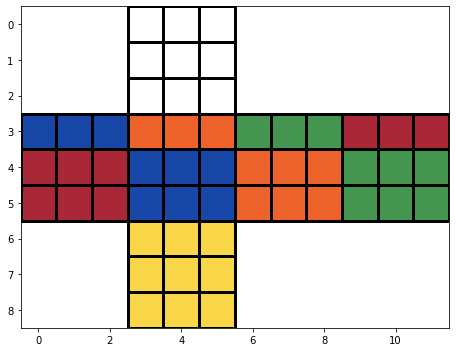

In [507]:
initcubies()
(syms["S_URF3"].inv()*syms["S_URF3"].inv()*moves["R"]*syms["S_URF3"]*syms["S_URF3"])()
color_cube()
plot_cube()

In [508]:
#COORD lvl
import math
from math import prod as prod
def conv_position(move):
    coords = {}
    co = ""
    eo = ""
    cp = ""
    ep = ""
    values = [cubies[v] for v in identityc + identitye]
    for x in range(len(values)):
        if x<8:
            co += f"{values[x].o}"
        else:
            eo += f"{values[x].o}"
    for x in range(len(values)-2):
        if x < 7:
            cc = 0
            for y in values[:x+1]:
                if identityc.index(y.c)>identityc.index(values[x+1].c):
                    cc += 1
            cp += f"{cc}"
        else:
            ec = 0
            for y in values[8:x+2]:
                if identitye.index(y.c)>identitye.index(values[x+2].c):
                    ec += 1
            ep += f"{ec}"
    
    return((int(co[:-1],3),int(eo[:-1],2),sum([math.factorial(i+1)*int(cp[i]) for i in range(len(cp))]),sum([math.factorial(i+1)*int(ep[i]) for i in range(len(ep))])))

def Si(ind):
    x4 = ind%2
    ind -= x4
    x3 = (ind%8)//2
    ind -= 2*x3
    x2 = (ind%16)//8
    x1 = (ind-8*x2)//16
    
    return prod([syms["S_URF3"]]*x1)*prod([syms["S_F2"]]*x2)*prod([syms["S_U4"]]*x3)*prod([syms["S_LR2"]]*x4)
    

In [546]:
(moves["F"]*moves["B"]).test_sym(moves["R"]*moves["L"])

True